<h2>Importing Libraries</h2>

In [1]:
# pip install plotly

In [2]:
#linear algebra
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
#statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr

<h2>Loading the dataset</h2>

In [3]:
df=pd.read_csv("../input/ford-used-car-listing/ford.csv")
df.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0


<h2>Data Pre-processing</h2>

In [4]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<p>No null values in the dataset</p>

<h2>Data Visualization</h2>

In [5]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

<h2>Visualization for target feature</h2>

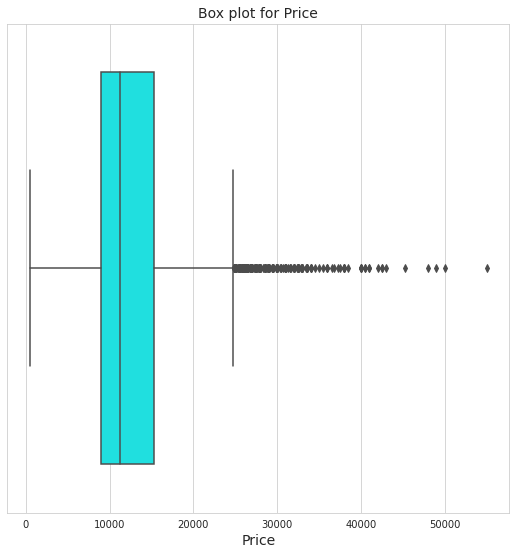

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,9))
sns.boxplot(x="price",data=df,color="aqua")
plt.xlabel("Price",fontsize=14)
plt.title("Box plot for Price",fontsize=14)
plt.show()

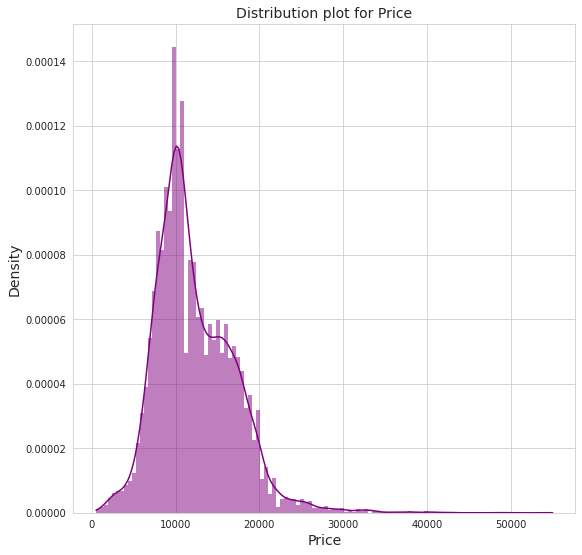

In [7]:
plt.figure(figsize=(9,9))
sns.histplot(x=df["price"], color="purple", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.xlabel("Price",fontsize=14)
plt.ylabel("Density",fontsize=14)
plt.title("Distribution plot for Price",fontsize=14)
plt.show()

<p>Area of density curve is very high from 0 to ~~25000. Looks like probability that a price lying in that region is ~~0.98. We will confirm that.</p>

In [8]:
print(df[df['price']>25000].shape)
print(df.shape)

(245, 9)
(17965, 9)


<p>approximately 1.36 percent of the data lies above 17965. So, we were kind of correct.Now, we will remove the supposed outliers.</p>

In [9]:
df=df[df['price']<=25000]
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


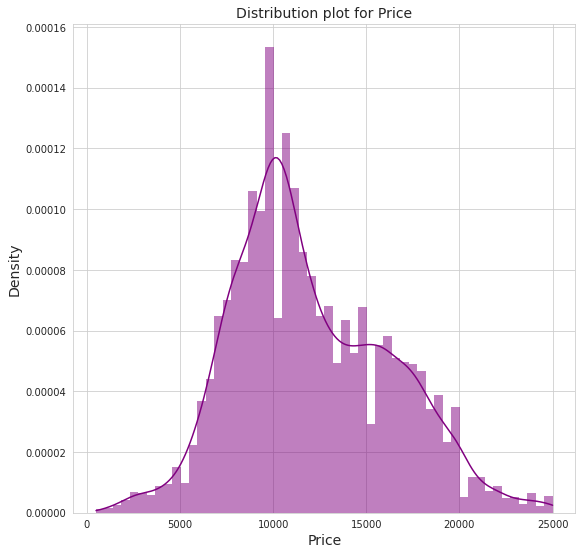

In [10]:
plt.figure(figsize=(9,9))
sns.histplot(x=df["price"], color="purple", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.xlabel("Price",fontsize=14)
plt.ylabel("Density",fontsize=14)
plt.title("Distribution plot for Price",fontsize=14)
plt.show()

<p>Now it looks a little less skewed and close to normal shape (</p>

<h2>Visualization for Categorical features</h2>

In [11]:
categorical=[feature for feature in df.columns if df[feature].dtype =="object"]
print(categorical)
df_categorical=df[categorical]


['model', 'transmission', 'fuelType']


<h2>Bar plot for categorical features</h2>

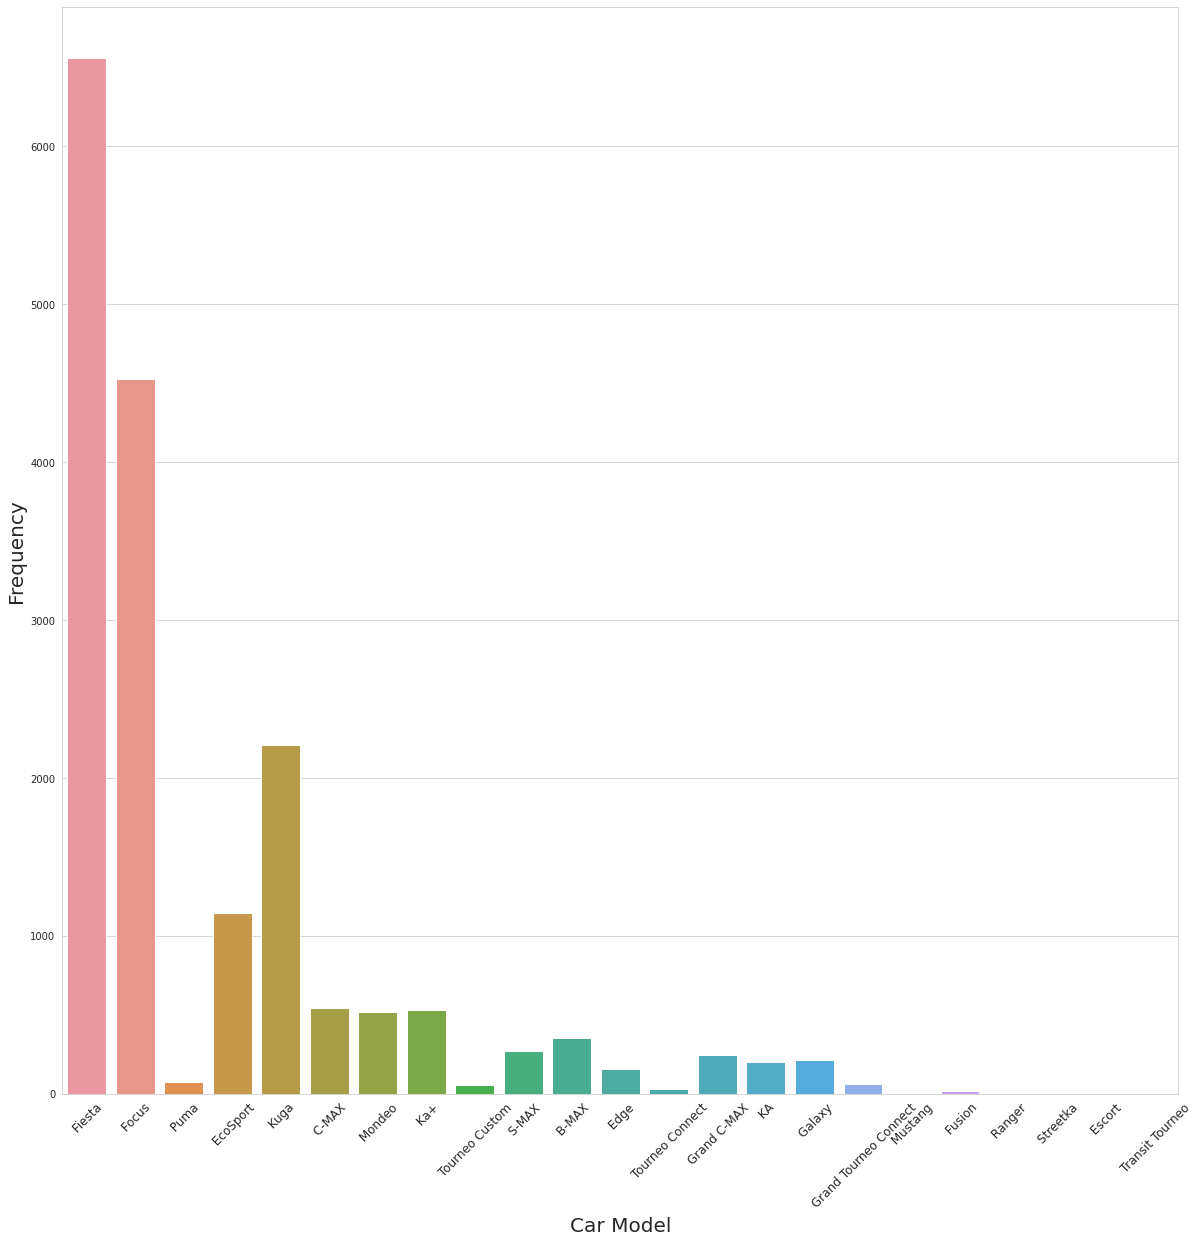

In [12]:
plt.figure(figsize=(20,20))
sns.countplot(x='model',data=df_categorical)
plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Car Model",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

In [13]:
df.head()
print(df.shape)
df['model'].value_counts()

(17720, 9)


 Fiesta                   6556
 Focus                    4527
 Kuga                     2206
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    520
 B-MAX                     355
 S-MAX                     272
 Grand C-MAX               247
 Galaxy                    213
 KA                        199
 Edge                      158
 Puma                       77
 Grand Tourneo Connect      59
 Tourneo Custom             56
 Tourneo Connect            33
 Fusion                     16
 Mustang                     4
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

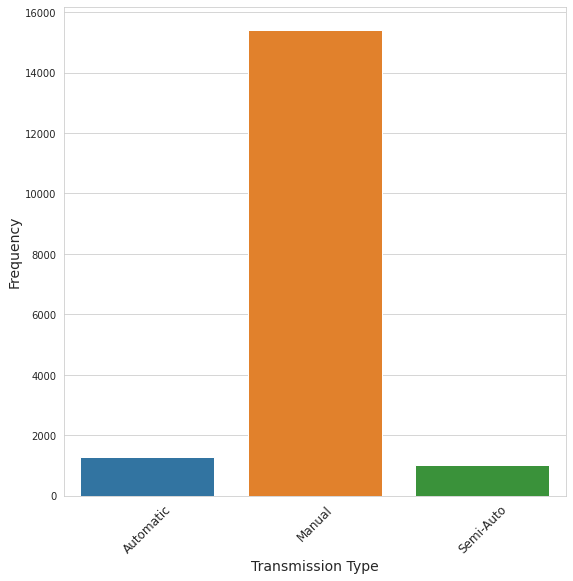

In [14]:
#bar plot for transmission
plt.figure(figsize=(9,9))
sns.countplot(x='transmission',data=df_categorical)
plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Transmission Type",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.show()

<p>Most cars are manual transmission type </p>

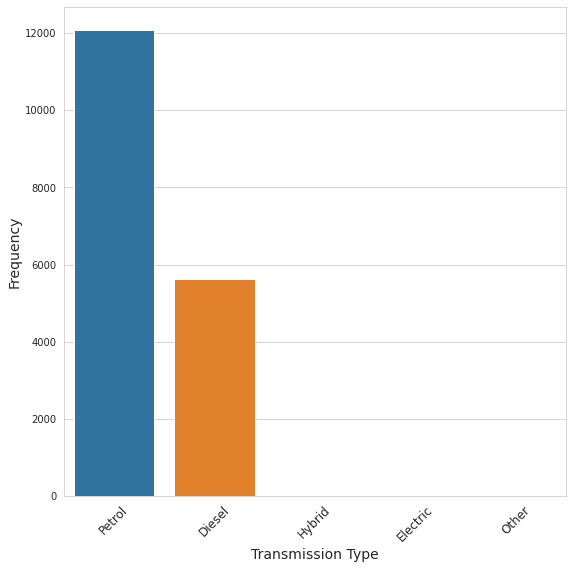

In [15]:
#bar plot for fuel type
#bar plot for transmission
plt.figure(figsize=(9,9))
sns.countplot(x='fuelType',data=df_categorical,palette="tab10")
plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Transmission Type",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.show()

<p>Insufficient samples for Hybrid, Electric and Other. Maybe creating more such samples might help.</p>

In [16]:
# redundant_fuelTypes=["Hybrid","Electric","Other"]
# redundant_fuelTypes=pd.Series(redundant_fuelTypes)
# df=df[~df['fuelType'].str.contains("|".join(redundant_fuelTypes))]

In [17]:
df['fuelType'].value_counts()

Petrol      12069
Diesel       5634
Hybrid         14
Electric        2
Other           1
Name: fuelType, dtype: int64

<h2>Bar plot for year of manufacture</h2>

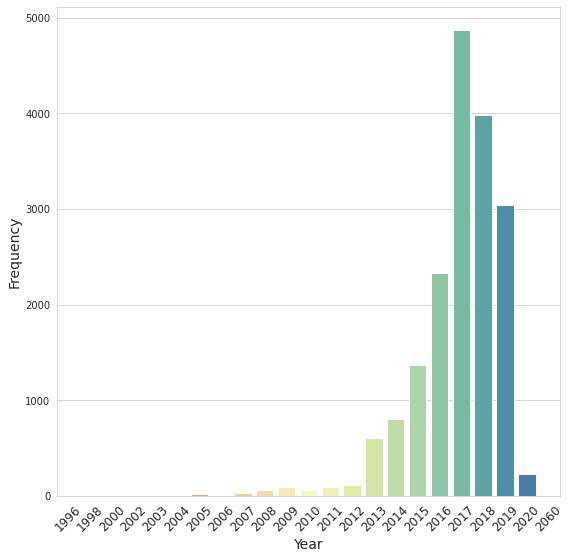

In [18]:
#bar plot for fuel type
#bar plot for transmission
plt.figure(figsize=(9,9))
sns.countplot(x='year',data=df,palette="Spectral")
plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.show()

<p>Most data is 2007 onwards</h2>

In [19]:
# df=df[df['year']>=2007]
# print(df.shape)
# df.head()

<h2>Pie Chart for  Year distribution</h2>

In [20]:
fig = {
  "data": [
    {
     
      "labels": df['year'],
      "domain": {"x": [0, .5]},
      "name": "Number Of Cars",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Manufacturing years of the cars",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of cars",
                "x": 0.20,
                "y": 1.2
            },
        ]
    }
}
iplot(fig)

<h2>Pie Chart for transmission type</h2>

In [21]:
fig = {
  "data": [
    {
     
      "labels": df['transmission'],
      "domain": {"x": [0, .5]},
      "name": "Number Of Cars",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Transmission Type of the Cars",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of cars",
                "x": 0.20,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

<h2>Pie Chart for Car Model</h2>

In [22]:
fig = {
  "data": [
    {
     
      "labels": df['model'],
      "domain": {"x": [0, .5]},
      "name": "Number Of Cars",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Car Models",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of cars",
                "x": 0.20,
                "y": 1.2
            },
        ]
    }
}
iplot(fig)

<h2>One-hot encoding</h2>

In [23]:
# to avoid dummy variable trap, we will be removing the first categorical variable
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

data_test = encode_and_bind(df,"transmission")
data_test.head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto
0,Fiesta,2017,12000,15944,Petrol,150,57.7,1.0,0,0
1,Focus,2018,14000,9083,Petrol,150,57.7,1.0,1,0
2,Focus,2017,13000,12456,Petrol,150,57.7,1.0,1,0
3,Fiesta,2019,17500,10460,Petrol,145,40.3,1.5,1,0
4,Fiesta,2019,16500,1482,Petrol,145,48.7,1.0,0,0


In [24]:
#performing one hot encoding for all categorical variables

categorical = [ feature for feature in df.columns if df[feature].dtype =="object" ]

for idx , feature in enumerate(categorical) :
    
    if idx == 0 :
        
        training_set = encode_and_bind(df,feature)
        continue
    
    training_set = encode_and_bind(training_set,feature)
    

training_set.rename(columns={"model_ Ka+":"model_Ka_plus"},inplace=True)
#remove spaces in column names
training_set.columns = training_set.columns.str.replace(" ","_")
training_set.columns = training_set.columns.str.replace("-","_")
training_set.head()




,year,price,mileage,tax,mpg,engineSize,model__C_MAX,model__EcoSport,model__Edge,model__Escort,...,model__Streetka,model__Tourneo_Connect,model__Tourneo_Custom,model__Transit_Tourneo,transmission_Manual,transmission_Semi_Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


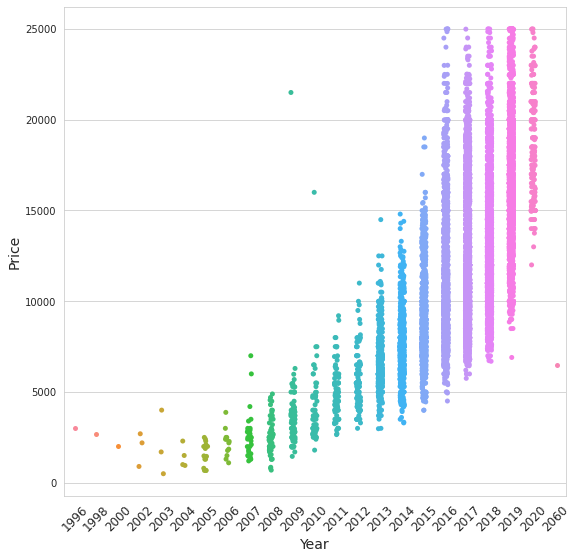

In [25]:
plt.figure(figsize=(9,9))
sns.stripplot(x="year",y="price",data=df)
plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.show()


<p> Looks like the average price conditional on year increases with year. So, we will include this in our regression model</p>

<h2> Performing ordinary least squares regression </h2>

In [26]:
Y = training_set['price']
X = training_set.drop(labels=["price"],axis=1)

In [27]:
X.head()

,year,mileage,tax,mpg,engineSize,model__C_MAX,model__EcoSport,model__Edge,model__Escort,model__Fiesta,...,model__Streetka,model__Tourneo_Connect,model__Tourneo_Custom,model__Transit_Tourneo,transmission_Manual,transmission_Semi_Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40.3,1.5,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [28]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2859.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:58:13   Log-Likelihood:            -1.5681e+05
No. Observations:               17720   AIC:                         3.137e+05
Df Residuals:                   17686   BIC:                         3.139e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.011e+06   1.94e+04   -103.389      0.000   -2.05e+06   -1.97e+06
year                          1004.3066      9.637    104.209      0.000     985.416    1023.197
mileage                         -0.0649      0.001    -65.944      0.000      -0.067      -0.063
tax                              0.3752      0.266      1.410      0.158      -0.146       0.897
mpg                            -87.6231      2.782    -31.497      0.000     -93.076     -82.170
engineSize                    1870.0658     74.798     25.002      0.000    1723.455    2016.677
model__C_MAX                  1104.6510    116.690      9.467      0.000     875.927    1333.375
model__EcoSport               1623.1176    104.814     15.486      0.000    1417.672    1828.563
model__Edge                   7871.9272    169.713     46.384      0.000    7539.273    8204.582
model__Escort                 1.308e+04   1699.807      7.696      0.000    9749.495    1.64e+04
model__Fiesta                 1185.3291     93.956     12.616      0.000    1001.165    1369.493
model__Focus                  3203.3503     94.430     33.923      0.000    3018.258    3388.443
model__Fusion                 2915.7014    436.094      6.686      0.000    2060.914    3770.489
model__Galaxy                 6585.4331    152.392     43.214      0.000    6286.731    6884.136
model__Grand_C_MAX            1517.8407    142.470     10.654      0.000    1238.586    1797.095
model__Grand_Tourneo_Connect  3965.9168    241.407     16.428      0.000    3492.736    4439.098
model__KA                     -612.0509    150.631     -4.063      0.000    -907.302    -316.800
model_Ka_plus                -2822.0778    117.611    -23.995      0.000   -3052.606   -2591.549
model__Kuga                   3808.2961    104.606     36.406      0.000    3603.258    4013.334
model__Mondeo                 3240.9842    122.541     26.448      0.000    3000.791    3481.177
model__Mustang                1.039e+04    855.690     12.137      0.000    8707.946    1.21e+04
model__Puma                   7940.1622    215.003     36.930      0.000    7518.735    8361.589
model__Ranger                 6100.6048   1693.774      3.602      0.000    2780.641    9420.569
model__S_MAX                  6009.3065    142.274     42.238      0.000    5730.436    6288.177
model__Streetka               4135.9814   1200.650      3.445      0.001    1782.589    6489.374
model__Tourneo_Connect        3165.2176    310.258     10.202      0.000    2557.082    3773.353
model__Tourneo_Custom         6075.9082    253.851     23.935      0.000    5578.336    6573.480
model__Transit_Tourneo        1697.0467   1691.718      1.003      0.316   -1618.887    5012.981
transmission_Manual           -320.2924     52.959     -6.048      0.000    

<h3> Condition number > 1000 , so there is  severe multicollinearty among variables </h2>

<h2> Calculating V.I.F </h2>

In [29]:
#gather features
f_list = training_set.columns.tolist()
f_list.remove("price")

features = "+".join(f_list)
print(features)

# get y and X dataframes based on this regression:
y_dash, X_dash = dmatrices('price ~{}'.format(features), training_set, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_dash.values, i) for i in range(X_dash.shape[1])]
vif["features"] = X_dash.columns

year+mileage+tax+mpg+engineSize+model__C_MAX+model__EcoSport+model__Edge+model__Escort+model__Fiesta+model__Focus+model__Fusion+model__Galaxy+model__Grand_C_MAX+model__Grand_Tourneo_Connect+model__KA+model_Ka_plus+model__Kuga+model__Mondeo+model__Mustang+model__Puma+model__Ranger+model__S_MAX+model__Streetka+model__Tourneo_Connect+model__Tourneo_Custom+model__Transit_Tourneo+transmission_Manual+transmission_Semi_Auto+fuelType_Electric+fuelType_Hybrid+fuelType_Other+fuelType_Petrol


In [30]:
vif.round(1)

,VIF Factor,features
0,2353356.3,Intercept
1,2.4,year
2,2.3,mileage
3,1.7,tax
4,4.4,mpg
5,5.2,engineSize
6,2.5,model__C_MAX
7,4.1,model__EcoSport
8,1.6,model__Edge
9,1.0,model__Escort


<p>Variables with high V.I.F :- model__Fiesta,model__Focus</p>

<h3> Dropping model__Fiesta and performing OLS </h3>

In [31]:
Y = training_set['price']
X = training_set.drop(labels=["price","model__Fiesta"],axis=1)

#perform ols
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     2917.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:58:16   Log-Likelihood:            -1.5689e+05
No. Observations:               17720   AIC:                         3.138e+05
Df Residuals:                   17687   BIC:                         3.141e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.023e+06   1.95e+04   -103.709      0.000   -2.06e+06   -1.99e+06
year                          1010.8897      9.666    104.579      0.000     991.943    1029.837
mileage                         -0.0646      0.001    -65.363      0.000      -0.067      -0.063
tax                              0.5268      0.267      1.973      0.049       0.003       1.050
mpg                            -82.9982      2.770    -29.963      0.000     -88.428     -77.569
engineSize                    1887.8166     75.118     25.131      0.000    1740.578    2035.056
model__C_MAX                    40.8401     81.020      0.504      0.614    -117.966     199.647
model__EcoSport                532.3694     59.516      8.945      0.000     415.713     649.026
model__Edge                   6878.9864    151.030     45.547      0.000    6582.953    7175.020
model__Escort                 1.216e+04   1705.816      7.129      0.000    8817.238    1.55e+04
model__Focus                  2100.4400     35.855     58.581      0.000    2030.160    2170.720
model__Fusion                 1895.8867    430.448      4.404      0.000    1052.166    2739.607
model__Galaxy                 5564.4517    129.703     42.902      0.000    5310.222    5818.681
model__Grand_C_MAX             467.1845    116.109      4.024      0.000     239.600     694.769
model__Grand_Tourneo_Connect  2922.4089    227.806     12.829      0.000    2475.887    3368.930
model__KA                    -1703.2370    123.873    -13.750      0.000   -1946.039   -1460.435
model_Ka_plus                -3931.6711     78.429    -50.131      0.000   -4085.399   -3777.943
model__Kuga                   2778.7417     65.732     42.274      0.000    2649.901    2907.583
model__Mondeo                 2180.1526     89.536     24.350      0.000    2004.654    2355.651
model__Mustang                9331.4406    855.403     10.909      0.000    7654.768     1.1e+04
model__Puma                   6841.4731    197.452     34.649      0.000    6454.447    7228.499
model__Ranger                 5164.7903   1699.698      3.039      0.002    1833.216    8496.365
model__S_MAX                  4986.5770    117.440     42.461      0.000    4756.384    5216.770
model__Streetka               3143.2828   1203.414      2.612      0.009     784.474    5502.091
model__Tourneo_Connect        2127.7489    300.495      7.081      0.000    1538.749    2716.749
model__Tourneo_Custom         5106.2516    243.014     21.012      0.000    4629.920    5582.583
model__Transit_Tourneo         729.7250   1697.519      0.430      0.667   -2597.579    4057.029
transmission_Manual           -324.4652     53.195     -6.100      0.000    -428.732    -220.198
transmission_Semi_Auto        -195.3819     71.933     -2.716      0.007    

<h3> Dropping model__Focus and performing OLS </h3>

In [32]:
Y = training_set['price']
X = training_set.drop(labels=["price","model__Focus"],axis=1)

#perform ols
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2734.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:58:16   Log-Likelihood:            -1.5736e+05
No. Observations:               17720   AIC:                         3.148e+05
Df Residuals:                   17687   BIC:                         3.151e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -2.07e+06      2e+04   -103.557      0.000   -2.11e+06   -2.03e+06
year                          1034.9178      9.902    104.515      0.000    1015.509    1054.327
mileage                         -0.0634      0.001    -62.515      0.000      -0.065      -0.061
tax                              0.8597      0.274      3.135      0.002       0.322       1.397
mpg                            -82.3017      2.866    -28.713      0.000     -87.920     -76.683
engineSize                    1965.0394     77.137     25.475      0.000    1813.844    2116.235
model__C_MAX                 -1817.3364     81.240    -22.370      0.000   -1976.576   -1658.097
model__EcoSport              -1311.5726     61.070    -21.477      0.000   -1431.276   -1191.869
model__Edge                   4928.8779    150.529     32.744      0.000    4633.827    5223.929
model__Escort                 1.071e+04   1752.706      6.112      0.000    7277.881    1.41e+04
model__Fiesta                -1765.4545     36.653    -48.167      0.000   -1837.298   -1693.611
model__Fusion                  165.5873    442.200      0.374      0.708    -701.169    1032.344
model__Galaxy                 3614.5143    128.702     28.084      0.000    3362.245    3866.783
model__Grand_C_MAX           -1404.5396    117.103    -11.994      0.000   -1634.074   -1175.006
model__Grand_Tourneo_Connect   978.5196    231.962      4.218      0.000     523.852    1433.187
model__KA                    -3464.4361    128.976    -26.861      0.000   -3717.242   -3211.630
model_Ka_plus                -5782.9435     81.352    -71.086      0.000   -5942.401   -5623.486
model__Kuga                    837.7180     59.051     14.186      0.000     721.973     953.464
model__Mondeo                  233.4851     87.302      2.674      0.007      62.365     404.605
model__Mustang                7329.0137    878.157      8.346      0.000    5607.741    9050.287
model__Puma                   4980.7881    202.796     24.561      0.000    4583.289    5378.288
model__Ranger                 3103.4878   1745.581      1.778      0.075    -318.022    6524.998
model__S_MAX                  3039.8189    115.745     26.263      0.000    2812.947    3266.691
model__Streetka               1455.6732   1236.375      1.177      0.239    -967.743    3879.089
model__Tourneo_Connect         198.0554    307.196      0.645      0.519    -404.079     800.190
model__Tourneo_Custom         3117.4869    246.027     12.671      0.000    2635.251    3599.723
model__Transit_Tourneo       -1206.7396   1743.603     -0.692      0.489   -4624.372    2210.893
transmission_Manual           -347.4836     54.647     -6.359      0.000    -454.598    -240.369
transmission_Semi_Auto        -330.8102     73.782     -4.484      0.000    

<h3> discarding model__Fiesta for high r squared values </h3>

In [33]:
training_set_new = training_set.drop(labels=["price","model__Fiesta"],axis=1)

#run OLS
X = training_set_new.copy()
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()



/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     2917.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:58:17   Log-Likelihood:            -1.5689e+05
No. Observations:               17720   AIC:                         3.138e+05
Df Residuals:                   17687   BIC:                         3.141e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.023e+06   1.95e+04   -103.709      0.000   -2.06e+06   -1.99e+06
year                          1010.8897      9.666    104.579      0.000     991.943    1029.837
mileage                         -0.0646      0.001    -65.363      0.000      -0.067      -0.063
tax                              0.5268      0.267      1.973      0.049       0.003       1.050
mpg                            -82.9982      2.770    -29.963      0.000     -88.428     -77.569
engineSize                    1887.8166     75.118     25.131      0.000    1740.578    2035.056
model__C_MAX                    40.8401     81.020      0.504      0.614    -117.966     199.647
model__EcoSport                532.3694     59.516      8.945      0.000     415.713     649.026
model__Edge                   6878.9864    151.030     45.547      0.000    6582.953    7175.020
model__Escort                 1.216e+04   1705.816      7.129      0.000    8817.238    1.55e+04
model__Focus                  2100.4400     35.855     58.581      0.000    2030.160    2170.720
model__Fusion                 1895.8867    430.448      4.404      0.000    1052.166    2739.607
model__Galaxy                 5564.4517    129.703     42.902      0.000    5310.222    5818.681
model__Grand_C_MAX             467.1845    116.109      4.024      0.000     239.600     694.769
model__Grand_Tourneo_Connect  2922.4089    227.806     12.829      0.000    2475.887    3368.930
model__KA                    -1703.2370    123.873    -13.750      0.000   -1946.039   -1460.435
model_Ka_plus                -3931.6711     78.429    -50.131      0.000   -4085.399   -3777.943
model__Kuga                   2778.7417     65.732     42.274      0.000    2649.901    2907.583
model__Mondeo                 2180.1526     89.536     24.350      0.000    2004.654    2355.651
model__Mustang                9331.4406    855.403     10.909      0.000    7654.768     1.1e+04
model__Puma                   6841.4731    197.452     34.649      0.000    6454.447    7228.499
model__Ranger                 5164.7903   1699.698      3.039      0.002    1833.216    8496.365
model__S_MAX                  4986.5770    117.440     42.461      0.000    4756.384    5216.770
model__Streetka               3143.2828   1203.414      2.612      0.009     784.474    5502.091
model__Tourneo_Connect        2127.7489    300.495      7.081      0.000    1538.749    2716.749
model__Tourneo_Custom         5106.2516    243.014     21.012      0.000    4629.920    5582.583
model__Transit_Tourneo         729.7250   1697.519      0.430      0.667   -2597.579    4057.029
transmission_Manual           -324.4652     53.195     -6.100      0.000    -428.732    -220.198
transmission_Semi_Auto        -195.3819     71.933     -2.716      0.007    

 Now, level of significance is 0.05 or rejection region in right-tailed test has p-value of less than or equal to 5 percent
model__C_MAX, fuelType_Electric,fuelType_Other and model__Transit_Tourneo has p value greater than 0.05.
$$ H_0 : \hat{\beta_i} = 0 $$
$$ H_1 : \hat{\beta_i} \neq 0 $$
 If  p-value <= 0.05 , we reject $ H_0 $. This means that the regression parameter for that independent variable does determine the independent variable.
 Else, we accept $H_0$ that the variable is not significant for regression

<h3> Discarding model__C_MAX ,  fuelType_Electric,fuelType_Other and model__Transit_Tourneo </h2>

In [34]:
training_set_new = training_set_new.drop(labels=["model__C_MAX","fuelType_Electric","fuelType_Other","model__Transit_Tourneo"],axis=1)

#run OLS
X = training_set_new.copy()
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3334.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:58:18   Log-Likelihood:            -1.5689e+05
No. Observations:               17720   AIC:                         3.138e+05
Df Residuals:                   17691   BIC:                         3.141e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.023e+06   1.95e+04   -103.708      0.000   -2.06e+06   -1.98e+06
year                          1010.5229      9.663    104.575      0.000     991.582    1029.464
mileage                         -0.0646      0.001    -65.479      0.000      -0.067      -0.063
tax                              0.5072      0.266      1.906      0.057      -0.014       1.029
mpg                            -83.3050      2.669    -31.212      0.000     -88.536     -78.073
engineSize                    1885.8767     74.679     25.253      0.000    1739.499    2032.254
model__EcoSport                527.3159     58.417      9.027      0.000     412.813     641.819
model__Edge                   6866.1741    148.858     46.126      0.000    6574.397    7157.951
model__Escort                 1.215e+04   1705.707      7.123      0.000    8806.221    1.55e+04
model__Focus                  2095.4683     34.570     60.615      0.000    2027.708    2163.229
model__Fusion                 1888.6134    430.200      4.390      0.000    1045.379    2731.848
model__Galaxy                 5553.6543    127.888     43.426      0.000    5302.981    5804.328
model__Grand_C_MAX             457.5206    114.597      3.992      0.000     232.900     682.141
model__Grand_Tourneo_Connect  2910.7180    226.672     12.841      0.000    2466.418    3355.018
model__KA                    -1707.5705    123.615    -13.814      0.000   -1949.868   -1465.273
model_Ka_plus                -3935.3406     78.015    -50.443      0.000   -4088.258   -3782.423
model__Kuga                   2768.2100     62.176     44.523      0.000    2646.340    2890.080
model__Mondeo                 2181.6357     87.924     24.813      0.000    2009.296    2353.976
model__Mustang                9328.2918    855.370     10.906      0.000    7651.682     1.1e+04
model__Puma                   6836.7619    197.094     34.688      0.000    6450.438    7223.086
model__Ranger                 5152.5245   1699.408      3.032      0.002    1821.518    8483.531
model__S_MAX                  4976.0024    115.527     43.072      0.000    4749.559    5202.446
model__Streetka               3137.0070   1203.296      2.607      0.009     778.430    5495.584
model__Tourneo_Connect        2115.6960    299.609      7.062      0.000    1528.432    2702.960
model__Tourneo_Custom         5091.2518    240.834     21.140      0.000    4619.194    5563.309
transmission_Manual           -327.5927     53.118     -6.167      0.000    -431.709    -223.477
transmission_Semi_Auto        -200.0824     71.868     -2.784      0.005    -340.951     -59.213
fuelType_Hybrid               2621.5318    460.495      5.693      0.000    1718.916    3524.147
fuelType_Petrol               -633.5959     71.722     -8.834      0.000    

<h2> Dropping tax </h2>

In [35]:
training_set_new = training_set_new.drop(labels=["tax"],axis=1)

#run OLS
X = training_set_new.copy()
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3457.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:58:18   Log-Likelihood:            -1.5689e+05
No. Observations:               17720   AIC:                         3.138e+05
Df Residuals:                   17692   BIC:                         3.141e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.032e+06   1.89e+04   -107.602      0.000   -2.07e+06   -1.99e+06
year                          1015.1805      9.350    108.577      0.000     996.854    1033.507
mileage                         -0.0647      0.001    -65.507      0.000      -0.067      -0.063
mpg                            -84.4699      2.598    -32.510      0.000     -89.563     -79.377
engineSize                    1906.1631     73.922     25.786      0.000    1761.268    2051.058
model__EcoSport                534.5053     58.299      9.168      0.000     420.233     648.778
model__Edge                   6877.5190    148.750     46.235      0.000    6585.953    7169.085
model__Escort                 1.229e+04   1704.341      7.208      0.000    8944.904    1.56e+04
model__Focus                  2099.0510     34.521     60.804      0.000    2031.386    2166.716
model__Fusion                 1948.7932    429.072      4.542      0.000    1107.770    2789.817
model__Galaxy                 5566.6252    127.717     43.586      0.000    5316.288    5816.962
model__Grand_C_MAX             446.5296    114.460      3.901      0.000     222.177     670.882
model__Grand_Tourneo_Connect  2920.1803    226.635     12.885      0.000    2475.954    3364.407
model__KA                    -1723.5598    123.339    -13.974      0.000   -1965.317   -1481.803
model_Ka_plus                -3933.8029     78.017    -50.423      0.000   -4086.723   -3780.882
model__Kuga                   2775.5533     62.061     44.723      0.000    2653.908    2897.198
model__Mondeo                 2180.3959     87.928     24.797      0.000    2008.048    2352.744
model__Mustang                9369.8788    855.156     10.957      0.000    7693.690     1.1e+04
model__Puma                   6839.3617    197.104     34.699      0.000    6453.018    7225.705
model__Ranger                 5176.5497   1699.488      3.046      0.002    1845.387    8507.713
model__S_MAX                  4988.8577    115.338     43.254      0.000    4762.784    5214.932
model__Streetka               3242.2605   1202.118      2.697      0.007     885.992    5598.529
model__Tourneo_Connect        2120.9515    299.619      7.079      0.000    1533.669    2708.234
model__Tourneo_Custom         5094.8512    240.844     21.154      0.000    4622.773    5566.929
transmission_Manual           -330.3944     53.101     -6.222      0.000    -434.478    -226.311
transmission_Semi_Auto        -203.8367     71.847     -2.837      0.005    -344.663     -63.010
fuelType_Hybrid               2601.9646    460.415      5.651      0.000    1699.506    3504.423
fuelType_Petrol               -619.2167     71.329     -8.681      0.000    -759.029    -479.404
============================================================================

Looks like now all the variables are statistically significant

<h2> Calculating VIF for the new model </h2>

In [36]:
#gather features
f_list = training_set_new.columns.tolist()

features = "+".join(f_list)
print(features)

# get y and X dataframes based on this regression:
y_dash, X_dash = dmatrices('price ~{}'.format(features), training_set, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_dash.values, i) for i in range(X_dash.shape[1])]
vif["features"] = X_dash.columns

year+mileage+mpg+engineSize+model__EcoSport+model__Edge+model__Escort+model__Focus+model__Fusion+model__Galaxy+model__Grand_C_MAX+model__Grand_Tourneo_Connect+model__KA+model_Ka_plus+model__Kuga+model__Mondeo+model__Mustang+model__Puma+model__Ranger+model__S_MAX+model__Streetka+model__Tourneo_Connect+model__Tourneo_Custom+transmission_Manual+transmission_Semi_Auto+fuelType_Hybrid+fuelType_Petrol


In [37]:
vif.round(1)

,VIF Factor,features
0,2198574.7,Intercept
1,2.3,year
2,2.3,mileage
3,3.8,mpg
4,5.1,engineSize
5,1.3,model__EcoSport
6,1.2,model__Edge
7,1.0,model__Escort
8,1.4,model__Focus
9,1.0,model__Fusion


<p> So, now we have low VIF's. This means according to V.I.F test, there is no multicollinearity in the model</p>

<h1 style="color:red;"> Checking assumptions for Classical Linear Regression</h1>

<h2> <u>Assumption 1</u> :-Linearity in Parameters</h2>

<p style="color:green;"> OLS is a linear least square estimator so satisfied</p> 


<h2> <u>Assumption 2</u> :- X values are non-stochastic.</h2>
<p style="color:green;"> Ols assumes this </p>


<h2> <u>Assumption 3</u> :- $E(u_i|X_i) = 0$</h2>
Softer version of this assumption is that $E(u_i)= 0.$ This means that the sum of all residuals in pop is zero. We can solve this using t-test on sample mean.

Another assumption of this is that $cov(u_i,X_i) = 0$. This we can simply find by correlation


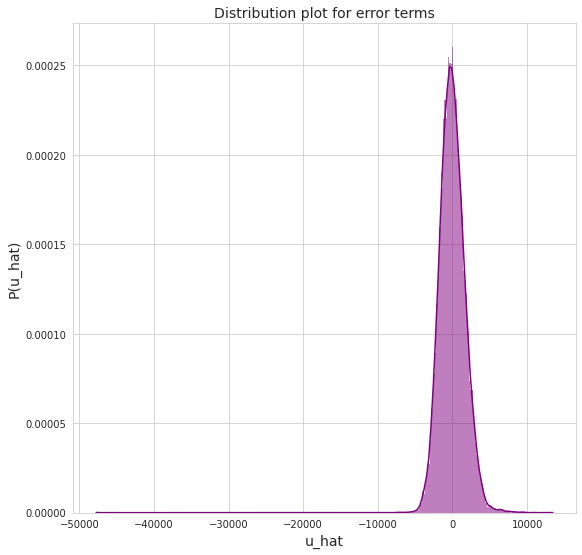

In [38]:
y_hat = model.predict(X)
u_hat = Y - y_hat

#checking normality of error terms
plt.figure(figsize=(9,9))
sns.histplot(x=u_hat, color="purple", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.xlabel("u_hat",fontsize=14)
plt.ylabel("P(u_hat)",fontsize=14)
plt.title("Distribution plot for error terms",fontsize=14)
plt.show()

<p> So, error terms are normally distributed. We can assume the same for population too. So, we can use parametric tests</p>

<h3> Sample mean </h3>

In [39]:
x_bar = np.mean(u_hat)


<h3> Sample standard deviation </h3>

In [40]:
s = np.std(u_hat)*len(u_hat)
s /= (len(u_hat) - 1)
print(s)

1694.066091097987


<h3>Standard error </h3>

In [41]:
import math

std_err = s / math.sqrt(len(u_hat))

print(std_err)

12.726192576081903


<h2> Test-statistic </h2>
<br>
$H_0 : \mu = 0$
<br/>
$H_1: \mu \neq 0 $

In [42]:
t = (x_bar - 0) / std_err
print(t)

-8.31251760610854e-10


In [43]:
print(format(-8.31251760610854e-10,'.15f'))

-0.000000000831252


In [44]:
from scipy.stats import ttest_1samp

ttest_1samp(u_hat,0)

Ttest_1sampResult(statistic=-8.316788598734752e-10, pvalue=0.9999999993364257)

<p> This value is symmetrical as student's t-distribution is symmetrical about the mean. </p>

<p style="color:green;">Now p-value is 0.999 or 99 percent, so at alpha =0.05 or 5 % signifiance, we can accept the null hypothesis by two-tailed t-test.</p>

Therefore, $u=0$.

Or, we can say that population mean of errors is 0. or $E(u_i) = 0$.

<h3> No correlation between independent varibles and error terms</h3>

In [45]:


ind_vars= list(training_set_new.columns)

corr_df = pd.DataFrame()

for variable in ind_vars:
    
    corr = pearsonr(u_hat,training_set_new[variable])[0]
    corr_df[variable]=[corr]

corr_df

,year,mileage,mpg,engineSize,model__EcoSport,model__Edge,model__Escort,model__Focus,model__Fusion,model__Galaxy,...,model__Puma,model__Ranger,model__S_MAX,model__Streetka,model__Tourneo_Connect,model__Tourneo_Custom,transmission_Manual,transmission_Semi_Auto,fuelType_Hybrid,fuelType_Petrol
0,2.083181e-12,-1.811884e-12,-8.422603e-14,-5.942365e-13,4.433888e-14,1.139321e-12,1.095905e-13,3.699818e-14,2.093602e-12,-9.777526e-13,...,1.442049e-12,-2.050716e-13,1.406472e-12,1.395894e-13,-5.858857e-13,-2.480672e-13,-5.141165e-13,-1.598625e-12,3.346075e-13,3.877922e-13


<p style="color:green;"> As, the error term is not at all correlated with any of the features, we have second condition satisfied too.
So, we can say that assumption 3 is satisfied.</p>

<h2> <u>Assumption 4</u> :- $ var(u_i|X_i) = \sigma^2 $. Or homoscedasticity is present</h2>

This assumption means that conditional variance is constant throughout the model.


<h3>Residual plot</h3>

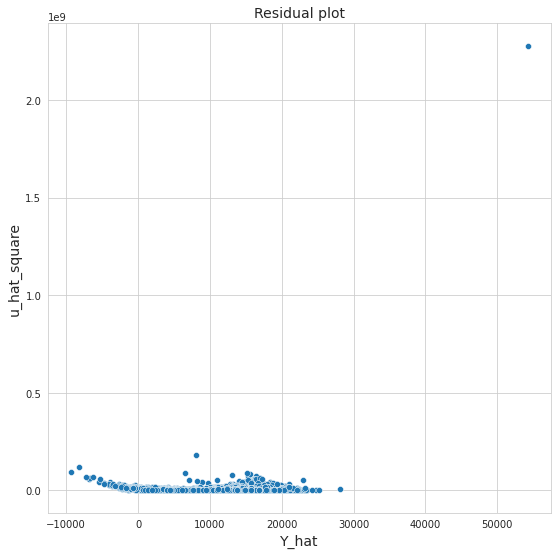

In [46]:
u_hat_square = np.square(u_hat)
d = pd.DataFrame()
d['residuals'] = u_hat_square
d['price'] = y_hat

plt.figure(figsize=(9,9))
a_plot = sns.scatterplot(x="price",y="residuals",data=d)
plt.ylabel("u_hat_square",fontsize=14)
plt.title("Residual plot",fontsize=14)
plt.xlabel("Y_hat",fontsize=14)
plt.show()



<p> Graphically, for positive values the error remains pretty constant. No heteroscedasticity graphically. </p>


<h3>1. Goldfeld Quandt test</h3>

In [47]:

#perform goldfeld quandt test
name = ["F statistic", "p-value"]
test = het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 1.3637812160866478), ('p-value', 2.879557422802617e-48)]

<h2> F-test </h2>
<br>
$H_0 :$  Homoscedasticity is present
<br>
$H_1:$ No Homoscedasticity

Now, Ftab=1

Ftab < Fcalc, So test statistic lies in the critical region.
Therefore, we reject null-hypothesis.
Therefore, heteroscedasticity is present.

<h3>2. Breusch Pagan Godfrey test</h3>

In [48]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1060.232385354235),
 ('p-value', 4.0300497281319137e-206),
 ('f-value', 41.70088704353548),
 ('f p-value', 6.31223955889762e-213)]

<p style="color:red;"> Againm by f-test, heteroscefasticity is very likely </p>

<h2> <u>Assumption 5</u>: No multicollinearity</h2>
    <p style="color:green;"> Already proved that multicollinearity is not present.</p>

<h2> <u>Assumption 6</u>: More observations than parameters to be estimated</h2>
<p style="color:green;"> Already satisfied </p>


<h1> Gauss Markov Validation </h1>

- <i style="color:green; font-size:20px">&#x2611;</i> Model is linear
- <i style="color:green; font-size:20px">&#x2611;</i> Model is unbiased i.e $E(\hat{\beta_2}) = \beta_2$
- <i style="color:red; font-size:20px">&#9746;</i> In this model all estimators do no assume minimum variance. An unbiased estimator with minimum variance is efficient estimator. But in our case, due to presence of heteroscedasticity.


### So, our model is not BLUE estimator in this case.

If we persist on using usual testing procedures despite heteroscedasticity, whatever conclusions or inferences that we draw might be misleading.


<h1> Remedies ?</h1>

1> As mentioned earlier in presence of heteroscedastic residuals the ordinary least square estimates no longer has minimum variance. However, we can still continue with our regression model if we can address the issue of incorrect standard errors in order to make our interval estimates and hypothesis tests valid. We can do this by using robust standard errors. The robust standard errors addresses the issue of having incorrect interval estimates due to erroneous standard error. However, even with robust standard error the estimates will no longer be minimum variance but we can be okay with it if we have a large enough sample. 

2> We can also try other regression like GLS.

<p> Comment if you find anything misleading or incorrect.  I am new to statistics so there might be a lot of errors.</p>